# Case Meli - Analytics Engineer
Este notebook contém os códigos e análises solicitadas no case 3 para a posição de Analytics Engineer no Mercado Livre. Conforme solicitado, serão encontradas abaixo 5 sessões referentes a cada uma das etapas. O objetivo primordial é: 
"Realizar uma análise da oferta/vitrine de opções de produtos que respondem a diferentes pesquisas no site https://mercadolibre.com.ar  utilizando a linguagem Python e as bibliotecas que julgar necessárias."

Por: Marcos Vinícius Lisboa Melo

## 1) Varreura de lista com mais de 150 itens de ids na API pública do Mercado Libre Argentina
Url: https://api.mercadolibre.com/sites/MLA/

Para realização das análises solicitadas foram escolhidos os disposivos _Chromecast_, _Apple TV_, _Amazon Fire TV_ e _Google Home_.

Import de libs necessárias para todo a análise:

In [76]:
#caso não possua as libs instaladas descomente a linha abaixo:
#!pip install re os json requests pandas concurrent matplotlib

In [67]:
import re
import os
import json
import requests
import pandas as pd
import concurrent.futures
import matplotlib.pyplot as plt

Definição de variáveis necessárias:

In [40]:
BASE_URL = "https://api.mercadolibre.com"
SITES_METHOD = "/sites/MLA/search?q=" # already setted to Argentina (MLA)
ITEMS_METHOD = "/items/"
SEARCH1 = "Chromecast"
SEARCH2 = "Apple%20TV"
SEARCH3 = "Amazon%20Fire%20TV"
SEARCH4 = "Google%20Home"
SEARCH_ARRAY = [SEARCH1, SEARCH2, SEARCH3, SEARCH4]
LIMIT = 50 # API limit of itens
FILE_PATH = f"{os.getcwd()}\\dataset\\dataset_items_meli_AR.csv" #using system path of notebook

Criação do método responsável por coletar informações da API e criação dos dataframes com itens:

In [38]:
def create_dataFrame_from_api_mla(url_base:str, method:str, search:str, limit:int):
    """
    Function responsible to perform a GET request on each item from a given list, use keywords 
    to search and create a single pd.DataFrame with captured data.
        Parameters:
            url_base (str): Base URL of MLA
            method (str): Endpoint to be requested
            search (str): Search product/content
            limit (int): API limit of itens on query/response
        Returns:
            data (pd.DataFrame): Single pandas DataFrame with response content
    """
    try:
        #assemblyring URL
        assembled_url = f"{url_base}{method}{search}&limit={limit}#json"
        print(assembled_url)
        
        #perform API request
        response = requests.get(assembled_url)
        
        #convert response to json and parse
        data = pd.DataFrame(response.json()["results"])
        
        return data
    
    except requests.exceptions.HTTPError as e:
        print (e.response.text)

Criando os dataframes contendo a consulta dos itens por dispositivo **(Consumer 1)**:

In [4]:
#creating a DataFrame with all search devices
list_items = []
for search_idx in SEARCH_ARRAY:
    list_items.append(create_dataFrame_from_api_mla(
        BASE_URL, 
        SITES_METHOD, 
        search_idx, 
        LIMIT
    ))

https://api.mercadolibre.com/sites/MLA/search?q=Chromecast&limit=50#json
https://api.mercadolibre.com/sites/MLA/search?q=Apple%20TV&limit=50#json
https://api.mercadolibre.com/sites/MLA/search?q=Amazon%20Fire%20TV&limit=50#json
https://api.mercadolibre.com/sites/MLA/search?q=Google%20Home&limit=50#json


Visualizando parte dos resultados para validação:

In [5]:
list_items[1].head(5)

,id,title,condition,thumbnail_id,catalog_product_id,listing_type_id,permalink,buying_mode,site_id,category_id,...,installments,winner_item_id,catalog_listing,discounts,promotions,inventory_id,variation_id,variation_filters,variations_data,differential_pricing
0,MLA1618186704,Apple Tv 4k (wifi + Ethernet) A2843 De Voz 3....,new,911533-MLA53244962397_012023,MLA1021015906,gold_special,https://www.mercadolibre.com.ar/apple-tv-4k-wi...,buy_it_now,MLA,MLA352001,...,"{'quantity': 12, 'amount': 81118.07, 'rate': 1...",None,True,None,[],None,NaN,NaN,NaN,NaN
1,MLA1154176154,Apple Tv Hd A1625 De Voz 4.ª Generación 2015 ...,new,633039-MLA32691404911_102019,MLA6253544,gold_special,https://www.mercadolibre.com.ar/apple-tv-hd-a1...,buy_it_now,MLA,MLA352001,...,"{'quantity': 12, 'amount': 36094.12, 'rate': 1...",None,True,None,[],QUZD84190,NaN,NaN,NaN,NaN
2,MLA1211662333,Apple Tv 4k 64gb Negro 1.ª Generación 2017,new,973117-MLA32691559270_102019,MLA8972017,gold_special,https://www.mercadolibre.com.ar/apple-tv-4k-64...,buy_it_now,MLA,MLA352001,...,"{'quantity': 12, 'amount': 50758.12, 'rate': 1...",None,True,None,[],DMTP90883,NaN,NaN,NaN,NaN
3,MLA1499376460,Apple Tv 4k Mxh02ll/a 64gb Chip A12 Bionic Eth...,new,708600-MLU71470973078_092023,MLA26809062,gold_special,https://www.mercadolibre.com.ar/apple-tv-4k-mx...,buy_it_now,MLA,MLA352001,...,"{'quantity': 12, 'amount': 56400, 'rate': 125....",None,True,None,[],None,NaN,NaN,NaN,NaN
4,MLA1361061092,Apple Tv 4k (wifi + Ethernet) A2843 De Voz 3....,new,911533-MLA53244962397_012023,MLA21015906,gold_special,https://www.mercadolibre.com.ar/apple-tv-4k-wi...,buy_it_now,MLA,MLA352001,...,"{'quantity': 12, 'amount': 62415.81, 'rate': 1...",None,True,None,[],None,NaN,NaN,NaN,NaN


## 2) Para cada resultado, realizar o GET correspondente por Item_Id ao recurso público:
Url: https://api.mercadolibre.com/items/{Item_Id}

Para esta tarefa, a partir da coluna de id obtida no consumo da API anterior e repousado no dataframe, é necessário realizar novamente uma chamada para o método _items_ e disponibilizar os dados em um novo dataframe.

Definindo métodos para consumir os dados:

In [41]:
def create_dataframe_from_items(url_base:str, method:str, items:list, search:str):
    """
    Function responsible to perform a GET request on each item from a given list and concatenate 
    on a single pd.DataFrame all the requested items.
        Parameters:
            url_base (str): Base URL of MLA
            method (str): Endpoint to be requested
            search (str): Search product/content
        Returns:
            data (pd.DataFrame): Single pandas DataFrame with response content
    
    """
    try:
        #creating empty dataframe base 
        data = pd.DataFrame()
        
        #iteration over list to get all items
        for item in items:
            #assemblyring URL
            assembled_url = f"{url_base}{method}{item}"
            
            #perform API request
            response = requests.get(assembled_url)
            
            #normalizing json data and concat on a single dataframe
            request_data = pd.json_normalize(response.json())
            request_data["search"] = search
            data = pd.concat([data, request_data])

        return data

    except requests.exceptions.HTTPError as e:
        print (e.response.text)
    

Para facilitar o consumo em paralelo das informações para cada um dispositivos pode-se utilizar uma simples abordagem multithread, consumindo cada um dos devices em uma thread, totalizando 4 concorrentes **(Consumer 2)**::

In [43]:
def multithread_consume_items(list_items_df:pd.DataFrame, search_array:list, base_url:str, method:str, num_threads:int):
    """
    Function responsible to perform a multithread call to request items function. This block
    of code is very usefull if we need to consume several items to a single dataset generation.
        Parameters:
            list_items_df (pd.DataFrame): DF containing items IDs to be requested 
            search_array (list): list of terms used on search to be attached on DF
            url_base (str): Base URL of MLA
            method (str): Endpoint to be requested
            num_threads (int): Number of max concurrent threads
        Returns:
            data (pd.DataFrame): Single pandas DataFrame with response content.
    """
    try:
        #creating necessary empty lists and dataframes
        data = pd.DataFrame()
        list_items_complete = []
        df_item = [None] * len(search_array)
        data_items = pd.DataFrame()
        
        #iterating over dataframes to get only id and add to other list
        for item in list_items_df:
            list_items_complete.append(item["id"].tolist())

        #using multithread approach to paralellize request
        with concurrent.futures.ThreadPoolExecutor(max_workers=num_threads) as executor:
            future_list = []
            #mount 4 concurrent threads and add to the pool iterating over list of items
            for idx, items in enumerate(list_items_complete):
                print("Thread "+str(idx)+" mounted!")
                df_item[idx] = executor.submit(
                                                create_dataframe_from_items, 
                                                base_url,
                                                method,
                                                items,
                                                search_array[idx]
                                                )
                future_list.append(df_item[idx])
            #waiting all threads are finalized to proceed
            concurrent.futures.wait(future_list, return_when=concurrent.futures.ALL_COMPLETED)
            print("All threads finalized!")
        
        #after all threads concluded unify results into a single dataframe
        for item in df_item:
            data = pd.concat([data, item.result()])

        return data
    
    except requests.exceptions.HTTPError as e:
        print (e.response.text)

Após definidos os métodos necessários, basta realizar a chamada da função com o dataframe originado do método anterior e assim concatenar todas as informações necessárias em um único dataframe:

In [44]:
#creating a single DataFrame with all items detailed
data_items = multithread_consume_items(
    list_items,
    SEARCH_ARRAY,
    BASE_URL,
    ITEMS_METHOD,
    4
)
data_items.head(5)

Thread 0 mounted!
Thread 1 mounted!
Thread 2 mounted!
Thread 3 mounted!
All threads finalized!


,id,site_id,title,seller_id,category_id,official_store_id,price,base_price,original_price,currency_id,...,seller_address.country.id,seller_address.country.name,seller_address.search_location.neighborhood.id,seller_address.search_location.neighborhood.name,seller_address.search_location.city.id,seller_address.search_location.city.name,seller_address.search_location.state.id,seller_address.search_location.state.name,seller_address.id,search
0,MLA1383723486,MLA,Chromecast Google Tv Hd 8gb 2gb Ram 60 Fps Wif...,278768157,MLA352001,None,70199.00,70199.00,None,ARS,...,AR,Argentina,TUxBQlNBTjgzMjRa,San Nicolás,TUxBQ0NBUGZlZG1sYQ,Capital Federal,TUxBUENBUGw3M2E1,Capital Federal,304854220,Chromecast
0,MLA1391964105,MLA,Onn Uhd Streaming 4k 2 Gb Ram Google Tv 2023 C...,207056678,MLA352001,None,70100.00,70100.00,None,ARS,...,AR,Argentina,NaN,NaN,TUxBQ0NBUGNiZGQx,Córdoba,TUxBUENPUmFkZGIw,Córdoba,1320400991,Chromecast
0,MLA1399533157,MLA,Google Chromecast Con Google Tv Hd - Blanco,303510157,MLA352001,None,74820.00,74820.00,87000,ARS,...,AR,Argentina,NaN,NaN,TUxBQ0NBUGNiZGQx,Córdoba,TUxBUENPUmFkZGIw,Córdoba,864948119,Chromecast
0,MLA1373748181,MLA,Google Chromecast With Google Tv De Voz 4.ª Ge...,668916751,MLA352001,None,82251.56,82251.56,None,ARS,...,AR,Argentina,TUxBQlJPUzI5MDha,Centro,TUxBQ1JPUzg1Yjg3,Rosario,TUxBUFNBTmU5Nzk2,Santa Fe,1141261416,Chromecast
0,MLA1400552985,MLA,Google Chromecast With Google Tv Ga01919-us De...,1473286957,MLA352001,None,89000.00,89000.00,None,ARS,...,AR,Argentina,TUxBQlNBTjgzMjRa,San Nicolás,TUxBQ0NBUGZlZG1sYQ,Capital Federal,TUxBUENBUGw3M2E1,Capital Federal,1326348531,Chromecast


In [45]:
#printing all features extracted from original response json
print("\n".join(data_items.columns.values.tolist()))

id
site_id
title
seller_id
category_id
official_store_id
price
base_price
original_price
currency_id
initial_quantity
sale_terms
buying_mode
listing_type_id
condition
permalink
thumbnail_id
thumbnail
pictures
video_id
descriptions
accepts_mercadopago
non_mercado_pago_payment_methods
international_delivery_mode
seller_contact
coverage_areas
attributes
listing_source
variations
status
sub_status
tags
warranty
catalog_product_id
domain_id
parent_item_id
deal_ids
automatic_relist
date_created
last_updated
health
catalog_listing
shipping.mode
shipping.methods
shipping.tags
shipping.dimensions
shipping.local_pick_up
shipping.free_shipping
shipping.logistic_type
shipping.store_pick_up
seller_address.city.id
seller_address.city.name
seller_address.state.id
seller_address.state.name
seller_address.country.id
seller_address.country.name
seller_address.search_location.neighborhood.id
seller_address.search_location.neighborhood.name
seller_address.search_location.city.id
seller_address.search_loca

# 3) Escreva os resultados:
Escreva os resultados em um arquivo simples delimitado por vírgulas, desnormalizando o JSON obtido na etapa anterior, em quantos campos forem necessários para salvar as variáveis que você está interessado em modelar.

Não será necessário utilizar os 64 campos desnormalizados do JSON original, até porque muitos desses campos servem de controle apenas para a aplicação que os gerencia. Para proósitos analíticos serão usados as seguintes features (variáveis):
- ```id: ``` identificador único do item
- ```title: ``` nome do item adicionado pelo vendedor
- ```seller_id: ``` identificador único do vendedor
- ```category_id: ``` identificador único da categoria
- ```price: ``` preço atual do item
- ```base_price: ``` preço base do item
- ```currency_id: ``` identificador único da moeda corrente
- ```initial_quantity: ``` quantidade inicial
- ```buying_mode: ``` modelo de compra (compre agora ou leilão)
- ```condition: ``` tipo de produto "new" ou "old"
- ```accepts_mercadopago: ``` variavel booleana sobre uso do MP
- ```non_mercado_pago_payment_methods: ``` outros metodos de pagamento não MP
- ```shipping.mode: ``` codigo do modo de envio
- ```seller_address.city.name: ``` cidade do vendedor
- ```seller_address.state.name: ``` estado do vendedor
- ```seller_address.country.name: ``` país do vendedor
- ```status: ``` status da compra
- ```warranty: ``` tipo de garantia
- ```catalog_product_id: ``` id fixo do catalogo
- ```date_created: ``` data de criação
- ```last_updated: ``` data da última atualização
- ```health: ``` score de saúde do item
- ```catalog_listing: ``` identificador se está listado no catálogo

In [46]:
#selecting just usefull features to be model
data_file = data_items[["id","title","seller_id","category_id","price","base_price","currency_id","initial_quantity","buying_mode","condition","accepts_mercadopago","non_mercado_pago_payment_methods","shipping.mode","seller_address.city.name","seller_address.state.name","seller_address.country.name","status","warranty","catalog_product_id","date_created","last_updated","health","catalog_listing"]]
data_file.head(10)

,id,title,seller_id,category_id,price,base_price,currency_id,initial_quantity,buying_mode,condition,...,seller_address.city.name,seller_address.state.name,seller_address.country.name,status,warranty,catalog_product_id,date_created,last_updated,health,catalog_listing
0,MLA1383723486,Chromecast Google Tv Hd 8gb 2gb Ram 60 Fps Wif...,278768157,MLA352001,70199.00,70199.00,ARS,726,buy_it_now,new,...,San Nicolás,Capital Federal,Argentina,paused,Garantía del vendedor: 6 meses,MLA21237756,2023-03-30T18:13:04.000Z,2024-02-07T02:05:39.000Z,NaN,True
0,MLA1391964105,Onn Uhd Streaming 4k 2 Gb Ram Google Tv 2023 C...,207056678,MLA352001,70100.00,70100.00,ARS,492,buy_it_now,new,...,Córdoba,Córdoba,Argentina,active,Garantía del vendedor: 6 meses,MLA24249930,2023-10-11T00:15:46.000Z,2024-02-07T01:09:07.000Z,NaN,True
0,MLA1399533157,Google Chromecast Con Google Tv Hd - Blanco,303510157,MLA352001,74820.00,74820.00,ARS,348,buy_it_now,new,...,Córdoba,Córdoba,Argentina,active,Garantía del vendedor: 30 días,MLA24460156,2023-12-20T16:32:17.000Z,2024-02-07T03:08:47.643Z,NaN,True
0,MLA1373748181,Google Chromecast With Google Tv De Voz 4.ª Ge...,668916751,MLA352001,82251.56,82251.56,ARS,39,buy_it_now,new,...,Rosario,Santa Fe,Argentina,active,Garantía del vendedor: 3 meses,MLA16233185,2023-06-17T20:11:05.000Z,2024-02-07T03:00:06.000Z,NaN,True
0,MLA1400552985,Google Chromecast With Google Tv Ga01919-us De...,1473286957,MLA352001,89000.00,89000.00,ARS,25,buy_it_now,new,...,San Nicolás,Capital Federal,Argentina,active,Garantía del vendedor: 6 meses,MLA16233187,2023-12-28T19:05:14.000Z,2024-02-06T22:20:10.000Z,NaN,True
0,MLA1485847292,Xiaomi Mi Tv Stick Full Hd 8gb C/control Netfl...,264842031,MLA352001,79999.99,79999.99,ARS,85,buy_it_now,new,...,Belgrano,Capital Federal,Argentina,active,Garantía del vendedor: 6 meses,MLA15984003,2023-08-28T14:54:04.000Z,2024-02-07T01:46:15.000Z,NaN,True
0,MLA1520576020,Chromecast Google Tv Hd 8gb 2gb Ram 60 Fps Wif...,1473286957,MLA352001,71300.00,71300.00,ARS,158,buy_it_now,new,...,San Nicolás,Capital Federal,Argentina,active,Garantía del vendedor: 12 meses,MLA21815165,2023-09-27T13:43:29.000Z,2024-02-07T03:16:25.570Z,NaN,True
0,MLA1407162573,Google Chromecast 2.ª Generación Full Hd 256mb...,201037847,MLA352001,57432.00,57432.00,ARS,9,buy_it_now,new,...,Buenos aires-.Caba,Capital Federal,Argentina,active,Garantía del vendedor: 1 meses,MLA6125039,2024-02-05T21:56:12.000Z,2024-02-07T01:54:46.000Z,NaN,True
0,MLA1513341308,Google Chromecast With Google Tv Ga01919-us De...,309453406,MLA352001,95490.00,95490.00,ARS,999,buy_it_now,new,...,Paternal,Capital Federal,Argentina,active,Garantía del vendedor: 6 meses,MLA16233186,2023-09-21T13:34:32.000Z,2024-02-06T22:10:35.000Z,NaN,True
0,MLA1500404334,Xiaomi Stick 4k Mdz-27-aa De Voz 4k 8gb Negro ...,155439078,MLA352001,100157.00,100157.00,ARS,133,buy_it_now,new,...,Paraná,Entre Ríos,Argentina,active,Garantía del vendedor: 6 meses,MLA19080742,2023-09-07T17:57:17.000Z,2024-02-07T00:14:32.017Z,NaN,True


Após seleção das features é necessário gravar o arquivo em disco para consumo posterior, neste caso, será um arquivo plano do tipo .CSV delimitado por vírgulas:

In [33]:
#writing dataframe to a .CSV file
data_file.to_csv(FILE_PATH, index=False)
print(f"File '{FILE_PATH}' created with success!")

File 'C:\Users\vini_\OneDrive\Documentos\case_meli\case_3_FE\dataset\dataset_items_meli_AR.csv' created with success!


# 4) Desenvolver o projeto e documentação da solução:
Apresente uma solução para esse cenário elaborando um diagrama de alto nível da solução e documentando as etapas necessárias para atingir esse objetivo.

Para atender os requisitos foi desenhada a seguinte solução diagramada abaixo:
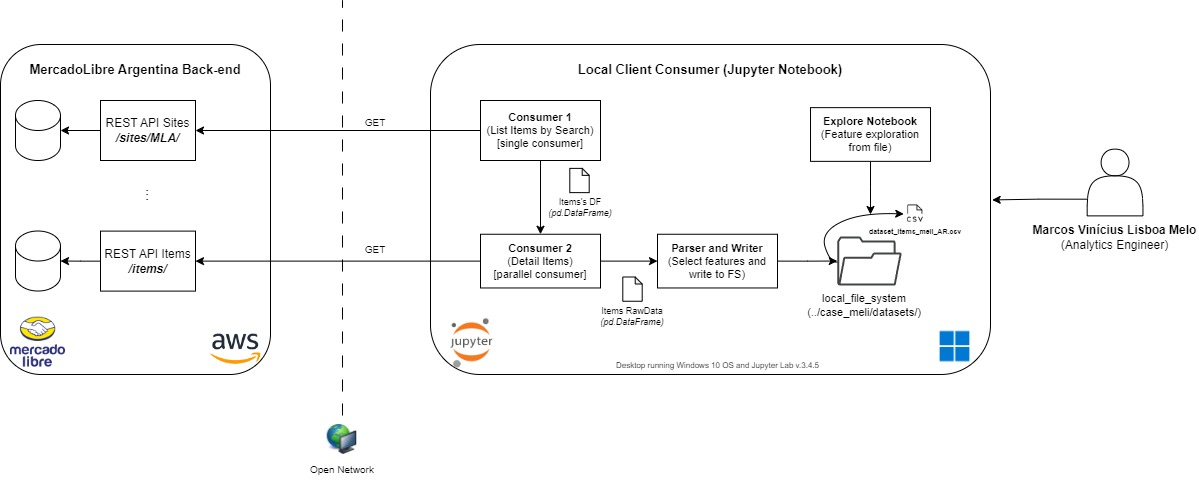

Toda documentação funcional e técnica encontra-se disponível dentro deste notebook e no repositório do GitHub onde o case foi disponibilizado.

# 5) Análise exploratória:
Realizar uma análise exploratória com as variáveis selecionadas para o modelo através de um notebook jupyter.

Para esta tarefa novamente será importado o conjunto de features, porém, dessa vez direto do arquivo .CSV persistido, e realizada algumas operações estatísticas com as variáveis selecionadas:

In [35]:
df_exp = pd.read_csv(FILE_PATH)

In [37]:
df_exp.head(5)

,id,title,seller_id,category_id,price,base_price,currency_id,initial_quantity,buying_mode,condition,...,seller_address.city.name,seller_address.state.name,seller_address.country.name,status,warranty,catalog_product_id,date_created,last_updated,health,catalog_listing
0,MLA1383723486,Chromecast Google Tv Hd 8gb 2gb Ram 60 Fps Wif...,278768157,MLA352001,70199.00,70199.00,ARS,726,buy_it_now,new,...,San Nicolás,Capital Federal,Argentina,active,Garantía del vendedor: 6 meses,MLA21237756,2023-03-30T18:13:04.000Z,2024-02-07T00:28:36.000Z,NaN,True
1,MLA1391964105,Onn Uhd Streaming 4k 2 Gb Ram Google Tv 2023 C...,207056678,MLA352001,70100.00,70100.00,ARS,492,buy_it_now,new,...,Córdoba,Córdoba,Argentina,active,Garantía del vendedor: 6 meses,MLA24249930,2023-10-11T00:15:46.000Z,2024-02-07T01:09:07.000Z,NaN,True
2,MLA1399533157,Google Chromecast Con Google Tv Hd - Blanco,303510157,MLA352001,74820.00,74820.00,ARS,348,buy_it_now,new,...,Córdoba,Córdoba,Argentina,active,Garantía del vendedor: 30 días,MLA24460156,2023-12-20T16:32:17.000Z,2024-02-07T00:48:59.157Z,NaN,True
3,MLA1373748181,Google Chromecast With Google Tv De Voz 4.ª Ge...,668916751,MLA352001,82251.56,82251.56,ARS,39,buy_it_now,new,...,Rosario,Santa Fe,Argentina,active,Garantía del vendedor: 3 meses,MLA16233185,2023-06-17T20:11:05.000Z,2024-02-07T00:28:45.778Z,NaN,True
4,MLA1400552985,Google Chromecast With Google Tv Ga01919-us De...,1473286957,MLA352001,89000.00,89000.00,ARS,25,buy_it_now,new,...,San Nicolás,Capital Federal,Argentina,active,Garantía del vendedor: 6 meses,MLA16233187,2023-12-28T19:05:14.000Z,2024-02-06T22:20:10.000Z,NaN,True


## Análises Descritivas:
Análises mais simples de medidas estatísticas:

In [63]:
#descritive analysis
detail = df_exp.describe()
detail.head()

,seller_id,price,base_price,initial_quantity,health
count,1.990000e+02,199.000000,199.000000,199.000000,148.000000
mean,3.100961e+08,138861.530251,138861.530251,493.809045,0.844459
std,3.449177e+08,137033.479889,137033.479889,2207.628325,0.100720
min,1.310890e+05,2694.600000,2694.600000,1.000000,0.500000
25%,8.173876e+07,63694.500000,63694.500000,4.000000,0.770000


In [52]:
# count of unique values
count_category = df_exp['category_id'].value_counts()
print(f"Count of unique values on column 'category_id':\n{count_category}")

Count of unique values on column 'category_id':
MLA352001    149
MLA409415     50
Name: category_id, dtype: int64


In [55]:
# calculating avg and median
avg_price = df_exp['price'].mean()
media_price = df_exp['price'].median()
print("Average of prices:", avg_price)
print("Median of prices:", media_price)

Average of prices: 138861.5302512563
Median of prices: 79999.0


## Análises Estatísticas Robustas

É possível realizar alguma anpalises mais rebuscadas como por exemplo correlação entre variáveis, histogramas, blox plots, tabelas de frequência, etc:

In [65]:
#correlation
correlation_matrix = df_exp.corr()
correlation_matrix.head()

,seller_id,price,base_price,initial_quantity,accepts_mercadopago,health,catalog_listing
seller_id,1.000000,-0.051452,-0.051452,0.080116,NaN,0.128687,0.263573
price,-0.051452,1.000000,1.000000,-0.075385,NaN,0.074750,0.058048
base_price,-0.051452,1.000000,1.000000,-0.075385,NaN,0.074750,0.058048
initial_quantity,0.080116,-0.075385,-0.075385,1.000000,NaN,-0.106140,-0.046635
accepts_mercadopago,NaN,NaN,NaN,NaN,NaN,NaN,NaN


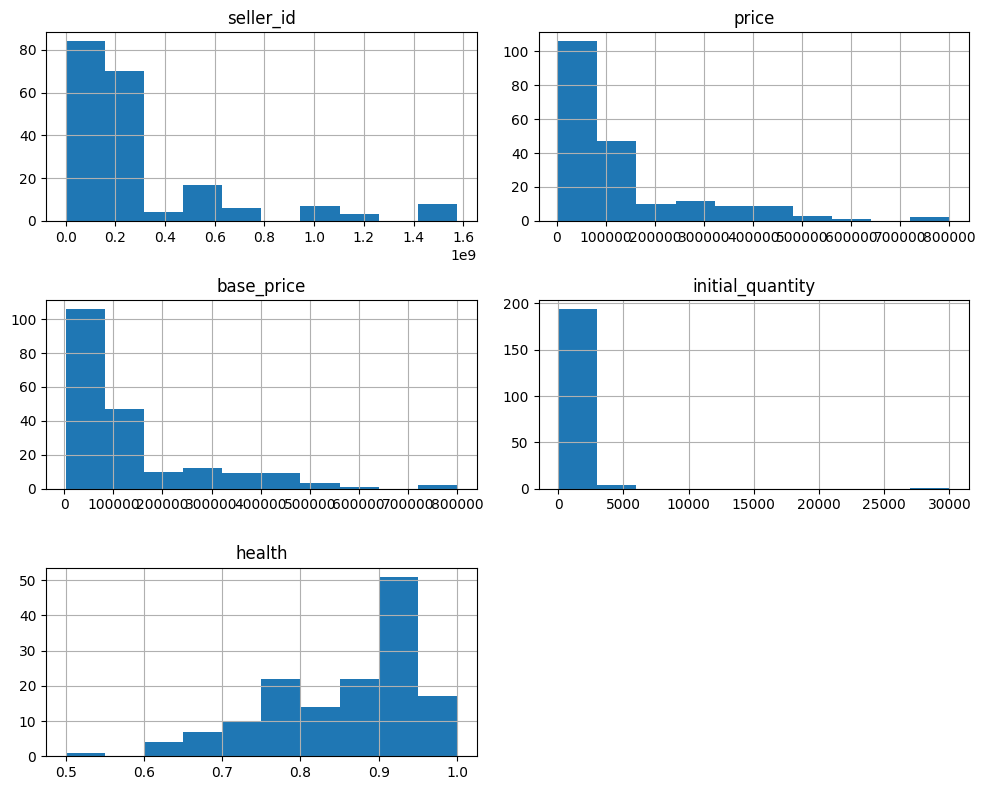

In [68]:
#histogram
df_exp.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

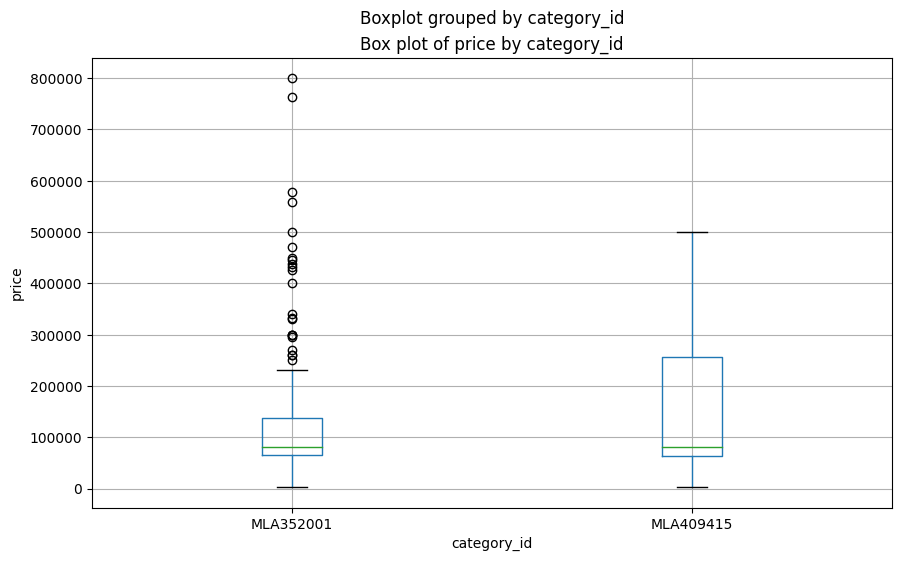

In [75]:
#box_plot
df_exp.boxplot(column='price', by='category_id', figsize=(10, 6))
plt.title('Box plot of price by category_id')
plt.xlabel('category_id')
plt.ylabel('price')
plt.show()

In [74]:
#frequency table
frequency_table = df_exp['seller_id'].value_counts()
print("Frequency table for seller_id:")
frequency_table.head(10)

Frequency table for seller_id:


284824585     19
119914491     13
309453406     11
1002842391     6
86898163       5
1473286957     5
247639927      4
69526727       4
499786196      4
53971387       4
Name: seller_id, dtype: int64